# **Anomaly Detection - A Network Security Problem**

In [24]:
#Load an image of network security , JUST BECAUSE :)
from IPython.display import Image
Image(url='https://images.spiceworks.com/wp-content/uploads/2021/02/24115356/shutterstock_1472495273.jpg')

**This project aims to enhance knowledge of machine learning in network security. With the proliferation of computer networks and applications, cybersecurity research faces challenges in detecting and mitigating intrusions that compromise system principles.I will be exploring the UNSW-NB15 dataset to explore anomaly detection techniques in Network Security. The main algorithms used in this notebook are PCA , GMM , K-Means , Isolation Forest and One Class SVM which are well known for anomaly detection.


**Project Steps**

1. **Exploratory Data **:
   - Describe the UNSW-NB15 dataset, including its source, size, and features.
   - Analyze the distribution of data to gain insights into its characteristics.
   - Identify any trends, patterns, or anomalies present in the dataset.

2. **Preprocessing Tasks**:
     - Handling missing or inconsistent data.
     - Removing outliers to improve model performance.
     - One-hot encoding categorical variables to convert them into numerical format.
     - Scaling features to address variations in their ranges.
     - Addressing dimensionality through Principal Component Analysis (PCA) to reduce the number of features while preserving important information.

4. **Anomaly Detection Models**:
   - Introduce the concept of anomaly detection and its relevance in network security.
   - Present four types of anomaly detection models:
     - Gaussian Mixture Model (GMM): Explain how it models the distribution of data using a mixture of Gaussian distributions.
     - K-Means: Describe its clustering approach to identifying anomalies based on data similarity.
     - Isolation Forest: Explain its tree-based algorithm for isolating anomalies as points with shorter average path lengths.
     - One-Class SVM: Discuss its ability to separate normal data points from outliers in high-dimensional space.

5. **Model Fitting and Evaluation**:
   - Explain the process of fitting each anomaly detection model using preprocessed data.
   - Define evaluation metrics, such as precision, recall, and F1-score, for assessing model performance.
   - Compare and analyze the performance of each model based on evaluation metrics.
   - Provide insights into the effectiveness of different models for detecting network intrusions.

6. **Conclusion and Future Work**:
   - Summarize key findings from the analysis and model evaluations.
   - Discuss limitations and potential areas for future research or improvement.
   - Emphasize the significance of machine learning in addressing network security challenges and the importance of continuous learning and adaptation in cybersecurity.


**About The Dataset Used**

N. Moustafa and J. Slay, "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)," 2015 Military Communications and Information Systems Conference (MilCIS), Canberra, ACT, Australia, 2015, pp. 1-6, doi: 10.1109/MilCIS.2015.7348942.Abstract: One of the major research challenges in this field is the unavailability of a comprehensive network based data set which can reflect modern network traffic scenarios, vast varieties of low footprint intrusions and depth structured information about the network traffic. Evaluating network intrusion detection systems research efforts, KDD98, KDDCUP99 and NSLKDD benchmark data sets were generated a decade ago. However, numerous current studies showed that for the current network threat environment, these data sets do not inclusively reflect network traffic and modern low footprint attacks. Countering the unavailability of network benchmark data set challenges, this paper examines a UNSW-NB15 data set creation. This data set has a hybrid of the real modern normal and the contemporary synthesized attack activities of the network traffic. Existing and novel methods are utilised to generate the features of the UNSWNB15 data set. This data set is available for research purposes and can be accessed from the link. keywords: {Telecommunication traffic;Feature extraction;Servers;Training;Data models;IP networks;Benchmark testing;UNSW-NB15 data set;NIDS;low footprint attacks;pcap files;testbed},URL: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7348942&isnumber=7348936



In [25]:
#Import necessary libraries
import pandas as pd
import numpy as np 
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#load training data
network_data = pd.read_csv('UNSW_NB15_training-set.csv')
print("=== UNSW_NB15 Data: {} rows x {} columns. ===".format(network_data.shape[0], network_data.shape[1]))
display (network_data.head())

=== UNSW_NB15 Data: 175341 rows x 45 columns. ===


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [27]:
#load test data
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [28]:
#check indexing
print(network_data.index)

RangeIndex(start=0, stop=175341, step=1)


In [29]:
# Display column names
print("Column Names:")
print(network_data.columns)

# Display data types of each column
print("\nData Types:")
print(network_data.dtypes)

Column Names:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

Data Types:
id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
d

**About the columns**

**proto:** Protocol used for communication, such as TCP, UDP, ICMP, etc. Understanding the protocol can help identify the type of network traffic.

**service:** The network service or application associated with the communication. For example, HTTP, FTP, SSH, etc. Knowing the service can provide context for the type of activity being conducted.

**state:** The state of the connection, such as "established", "closed", "reset", etc. This indicates the current status of the network communication.

**spkts:** Number of packets sent in the communication flow.

**dpkts:** Number of packets received in the communication flow.

**sbytes:** Number of bytes sent in the communication flow.

**dbytes:** Number of bytes received in the communication flow.

**rate:** Rate of data transfer, measured in bits per second.

**sttl:** Source time to live (TTL) field value. TTL is a value in IP packets that determines the maximum number of router hops the packet can traverse before being discarded.

**dttl:** Destination TTL field value.

**sload:** Source load, representing the data load on the source side.

**dload:** Destination load, representing the data load on the destination side.

**sloss:** Number of packets lost in the communication flow from the source.

**dloss:** Number of packets lost in the communication flow from the destination.

**sinpkt:** Interarrival time between packets sent from the source.

**dinpkt:** Interarrival time between packets received at the destination.

**sjit:** Source jitter, representing the variation in packet arrival times at the source.

**djit:** Destination jitter, representing the variation in packet arrival times at the destination.

**swin:** TCP window size advertised by the source.

**stcpb:** TCP base sequence number from the source.

**dtcpb:** TCP base sequence number from the destination.

**dwin:** TCP window size advertised by the destination.

**tcprtt:** Round-trip time for TCP packets.

**synack:** Time between SYN and ACK packets in a TCP handshake.

**ackdat:** Time between ACK and data packets in a TCP connection.

**smean:** Mean packet size sent from the source.

**dmean:** Mean packet size received at the destination.

**trans_depth:** Transaction depth.

**response_body_len:** Length of the response body in network transactions.

**ct_srv_src:** Number of connections to the same service as the current connection from the same source address.

**ct_state_ttl:** Number of connections with the same source and destination TTL values.

**ct_dst_ltm:** Number of connections to the same destination address in the last time frame.

**ct_src_dport_ltm:** Number of connections from the same source address and the same destination port in the last time frame.

**ct_dst_sport_ltm:** Number of connections to the same destination address and the same source port in the last time frame.

**ct_dst_src_ltm:** Number of connections from the same source to the same destination in the last time frame.

**is_ftp_login:** Indicates whether the FTP login attempt was successful.

**ct_ftp_cmd:** Number of FTP commands exchanged.

**ct_flw_http_mthd:** Number of HTTP methods observed in the flow.

**ct_src_ltm:** Number of connections from the same source address in the last time frame.

**ct_srv_dst:** Number of connections to the same service as the current connection from the same destination address.

**is_sm_ips_ports:** Indicates if source and destination IP addresses and ports are the same for the observed traffic.

**attack_cat:** Category of network attack (if applicable). This column may not be present in all datasets, but if available, it provides labels for different types of attacks.

**label:** Binary label indicating whether the network activity is malicious (e.g., attack) or benign (normal).

In [30]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(network_data.describe())


Summary Statistics:
                  id            dur          spkts          dpkts  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.731112       6.480249     136.887597     110.258271   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  1.753410e+05  1.753410e+05  1.753410e+05  175341.000000  175341.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747656e+05  1.436542e+05  1.654010e+05     102.940011     110.506863   
min    2.800000e+01  0.000000e+00

In [31]:
# Check for duplicates
duplicate_rows = network_data.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Check for null values
null_values_per_column = network_data.isnull().sum()
print("Number of null values per column:")
print(null_values_per_column)

Number of duplicate rows: 0
Number of null values per column:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm        

In [32]:
# Display unique values for categorical columns
print("\nUnique Values for Categorical Columns:")
for column in network_data.select_dtypes(include=['object']):
    print(f"\n{column}:")
    print(network_data[column].unique())


Unique Values for Categorical Columns:

proto:
['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 't

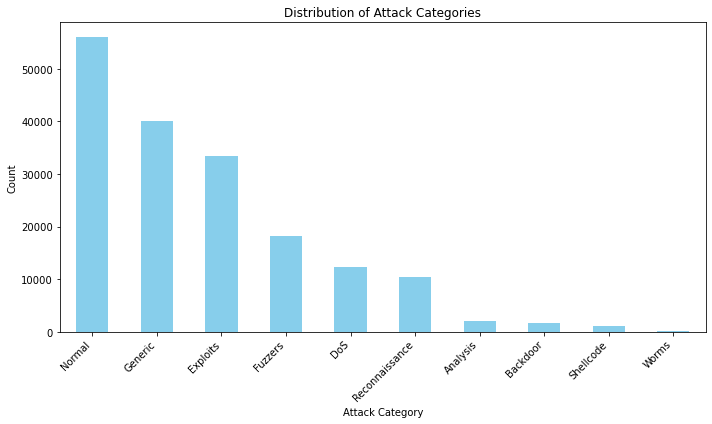

In [33]:
#View attack categories
attack_counts = network_data['attack_cat'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
attack_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

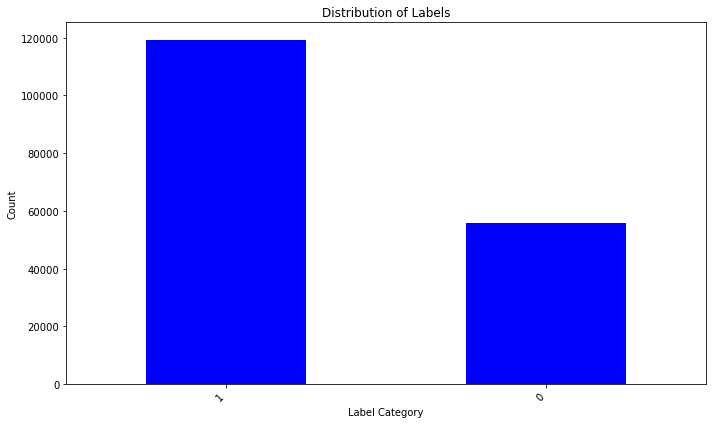

In [34]:
#View label counts
label_counts = network_data['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='blue')

# Customize the plot
plt.title('Distribution of Labels')
plt.xlabel('Label Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

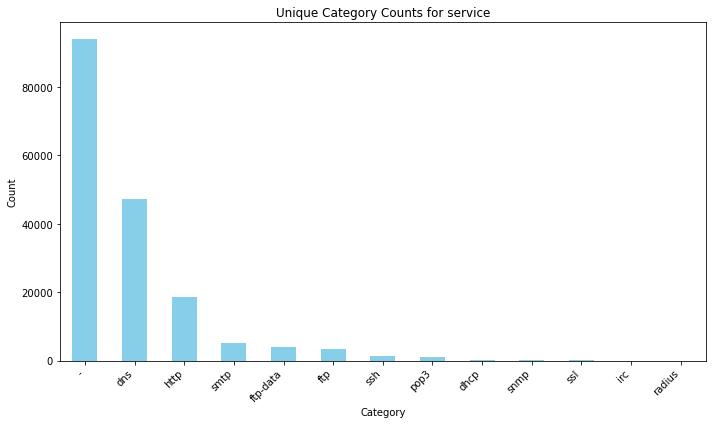

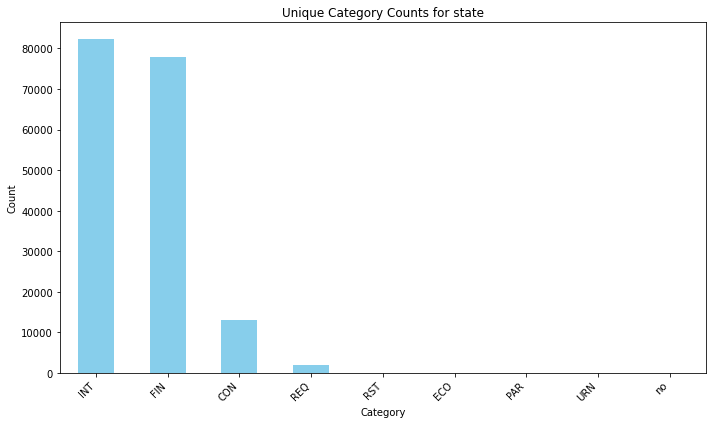

In [35]:
# Define the categorical columns to include
categorical_columns = ['service', 'state']  # Add your categorical column names here

# Plot unique category counts for each categorical column
for column in categorical_columns:
    # Count unique categories for the current column
    unique_categories = network_data[column].value_counts()

    # Create bar plot for unique category counts
    plt.figure(figsize=(10, 6))
    unique_categories.plot(kind='bar', color='skyblue')

    # Customize the plot
    plt.title(f'Unique Category Counts for {column}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()



In [36]:
print(network_data['proto'].unique())

['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2'
 'rdp' 'irtp

In [37]:
print(network_data['service'].unique())

['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3'
 'dhcp' 'ssl' 'irc']


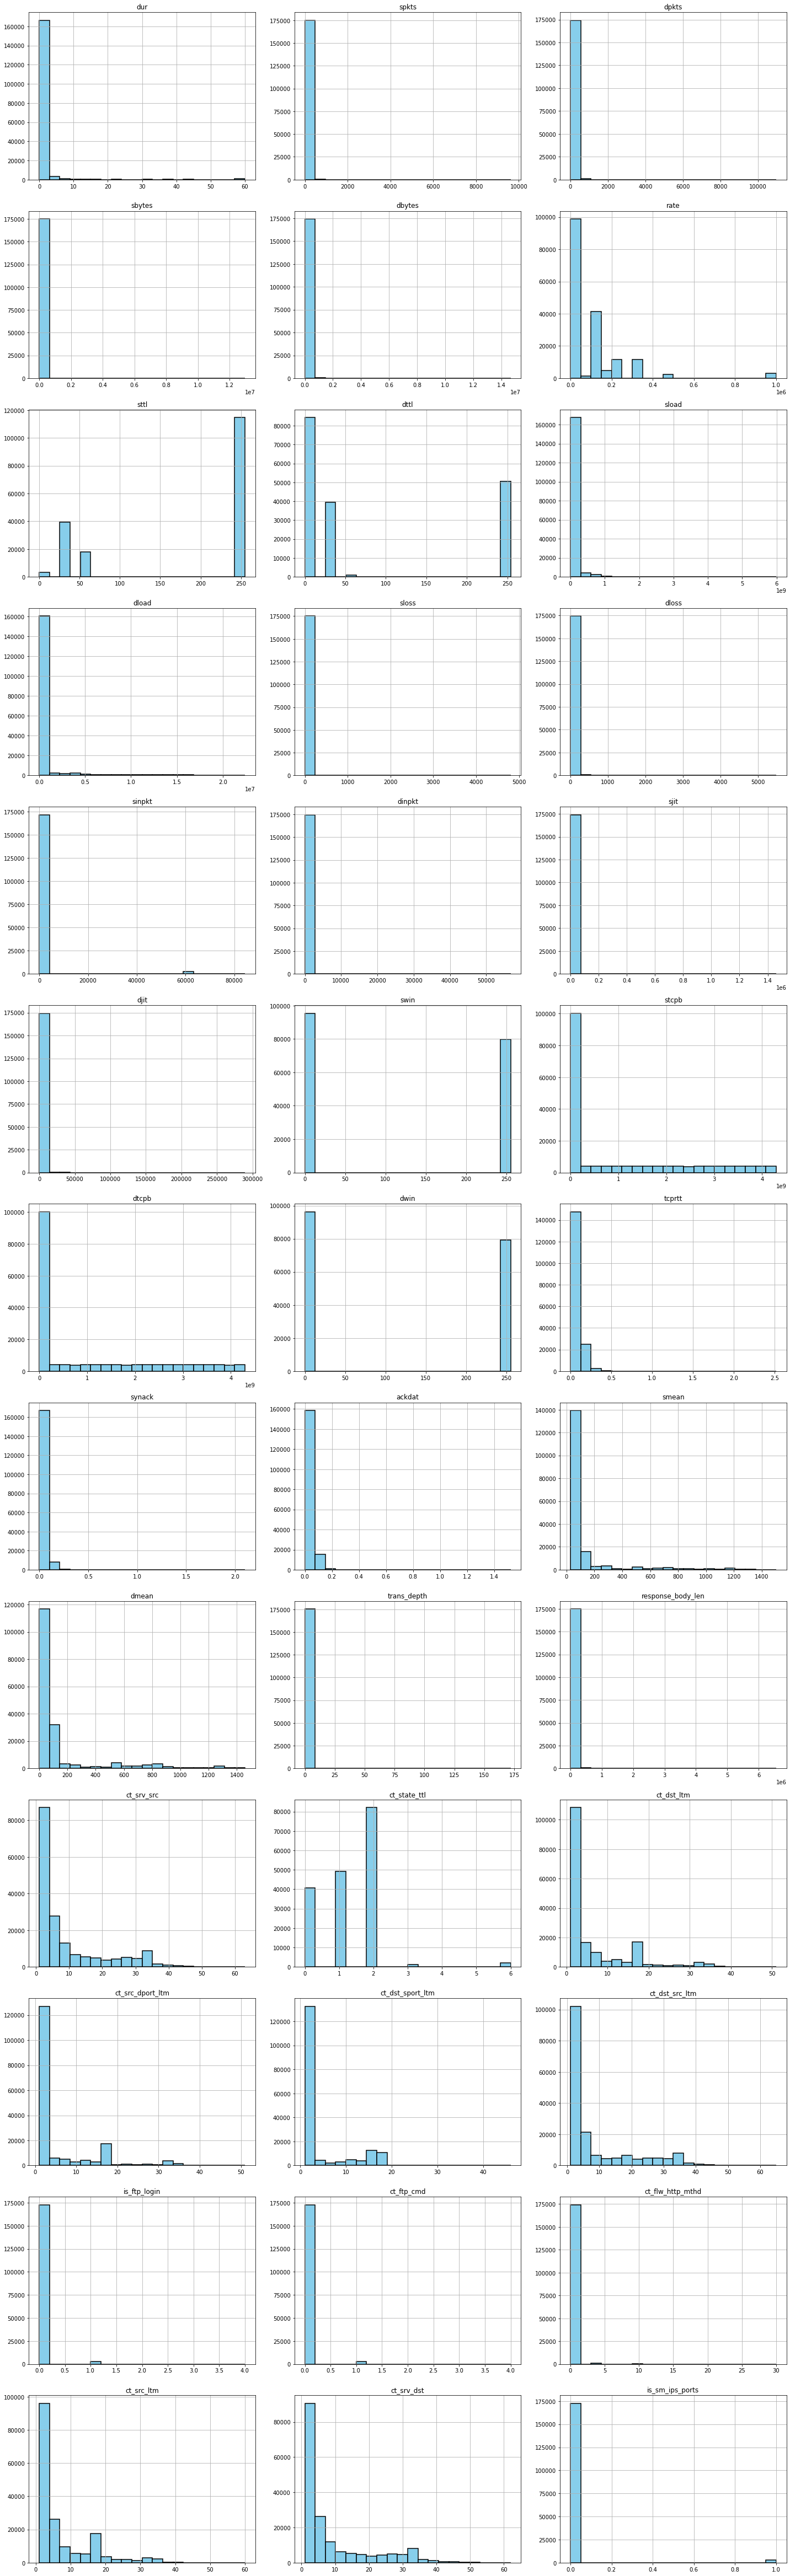

In [48]:
import matplotlib.pyplot as plt

# Select numerical columns excluding 'ID' and 'Label'
numerical_columns = network_data.drop(columns=['id', 'label']).select_dtypes(include=['int', 'float']).columns

# Plot histograms of numerical columns separately, arranging them in multiple plots per line
num_plots = len(numerical_columns)
num_plots_per_line = 3  # Define the number of plots per line
num_rows = (num_plots + num_plots_per_line - 1) // num_plots_per_line  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_plots_per_line, figsize=(20, 5*num_rows))  # Increase figure size

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numerical_columns):
    row_idx = i // num_plots_per_line
    col_idx = i % num_plots_per_line
    network_data[column].hist(bins=20, ax=axes[row_idx, col_idx], color='skyblue', edgecolor='black', linewidth=1.5)
    axes[row_idx, col_idx].set_title(column)  # Set title for each subplot

# Remove empty subplots if the number of plots is not a multiple of num_plots_per_line
if num_plots % num_plots_per_line != 0:
    for j in range(num_plots % num_plots_per_line, num_plots_per_line):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()  # Adjust layout
plt.show()


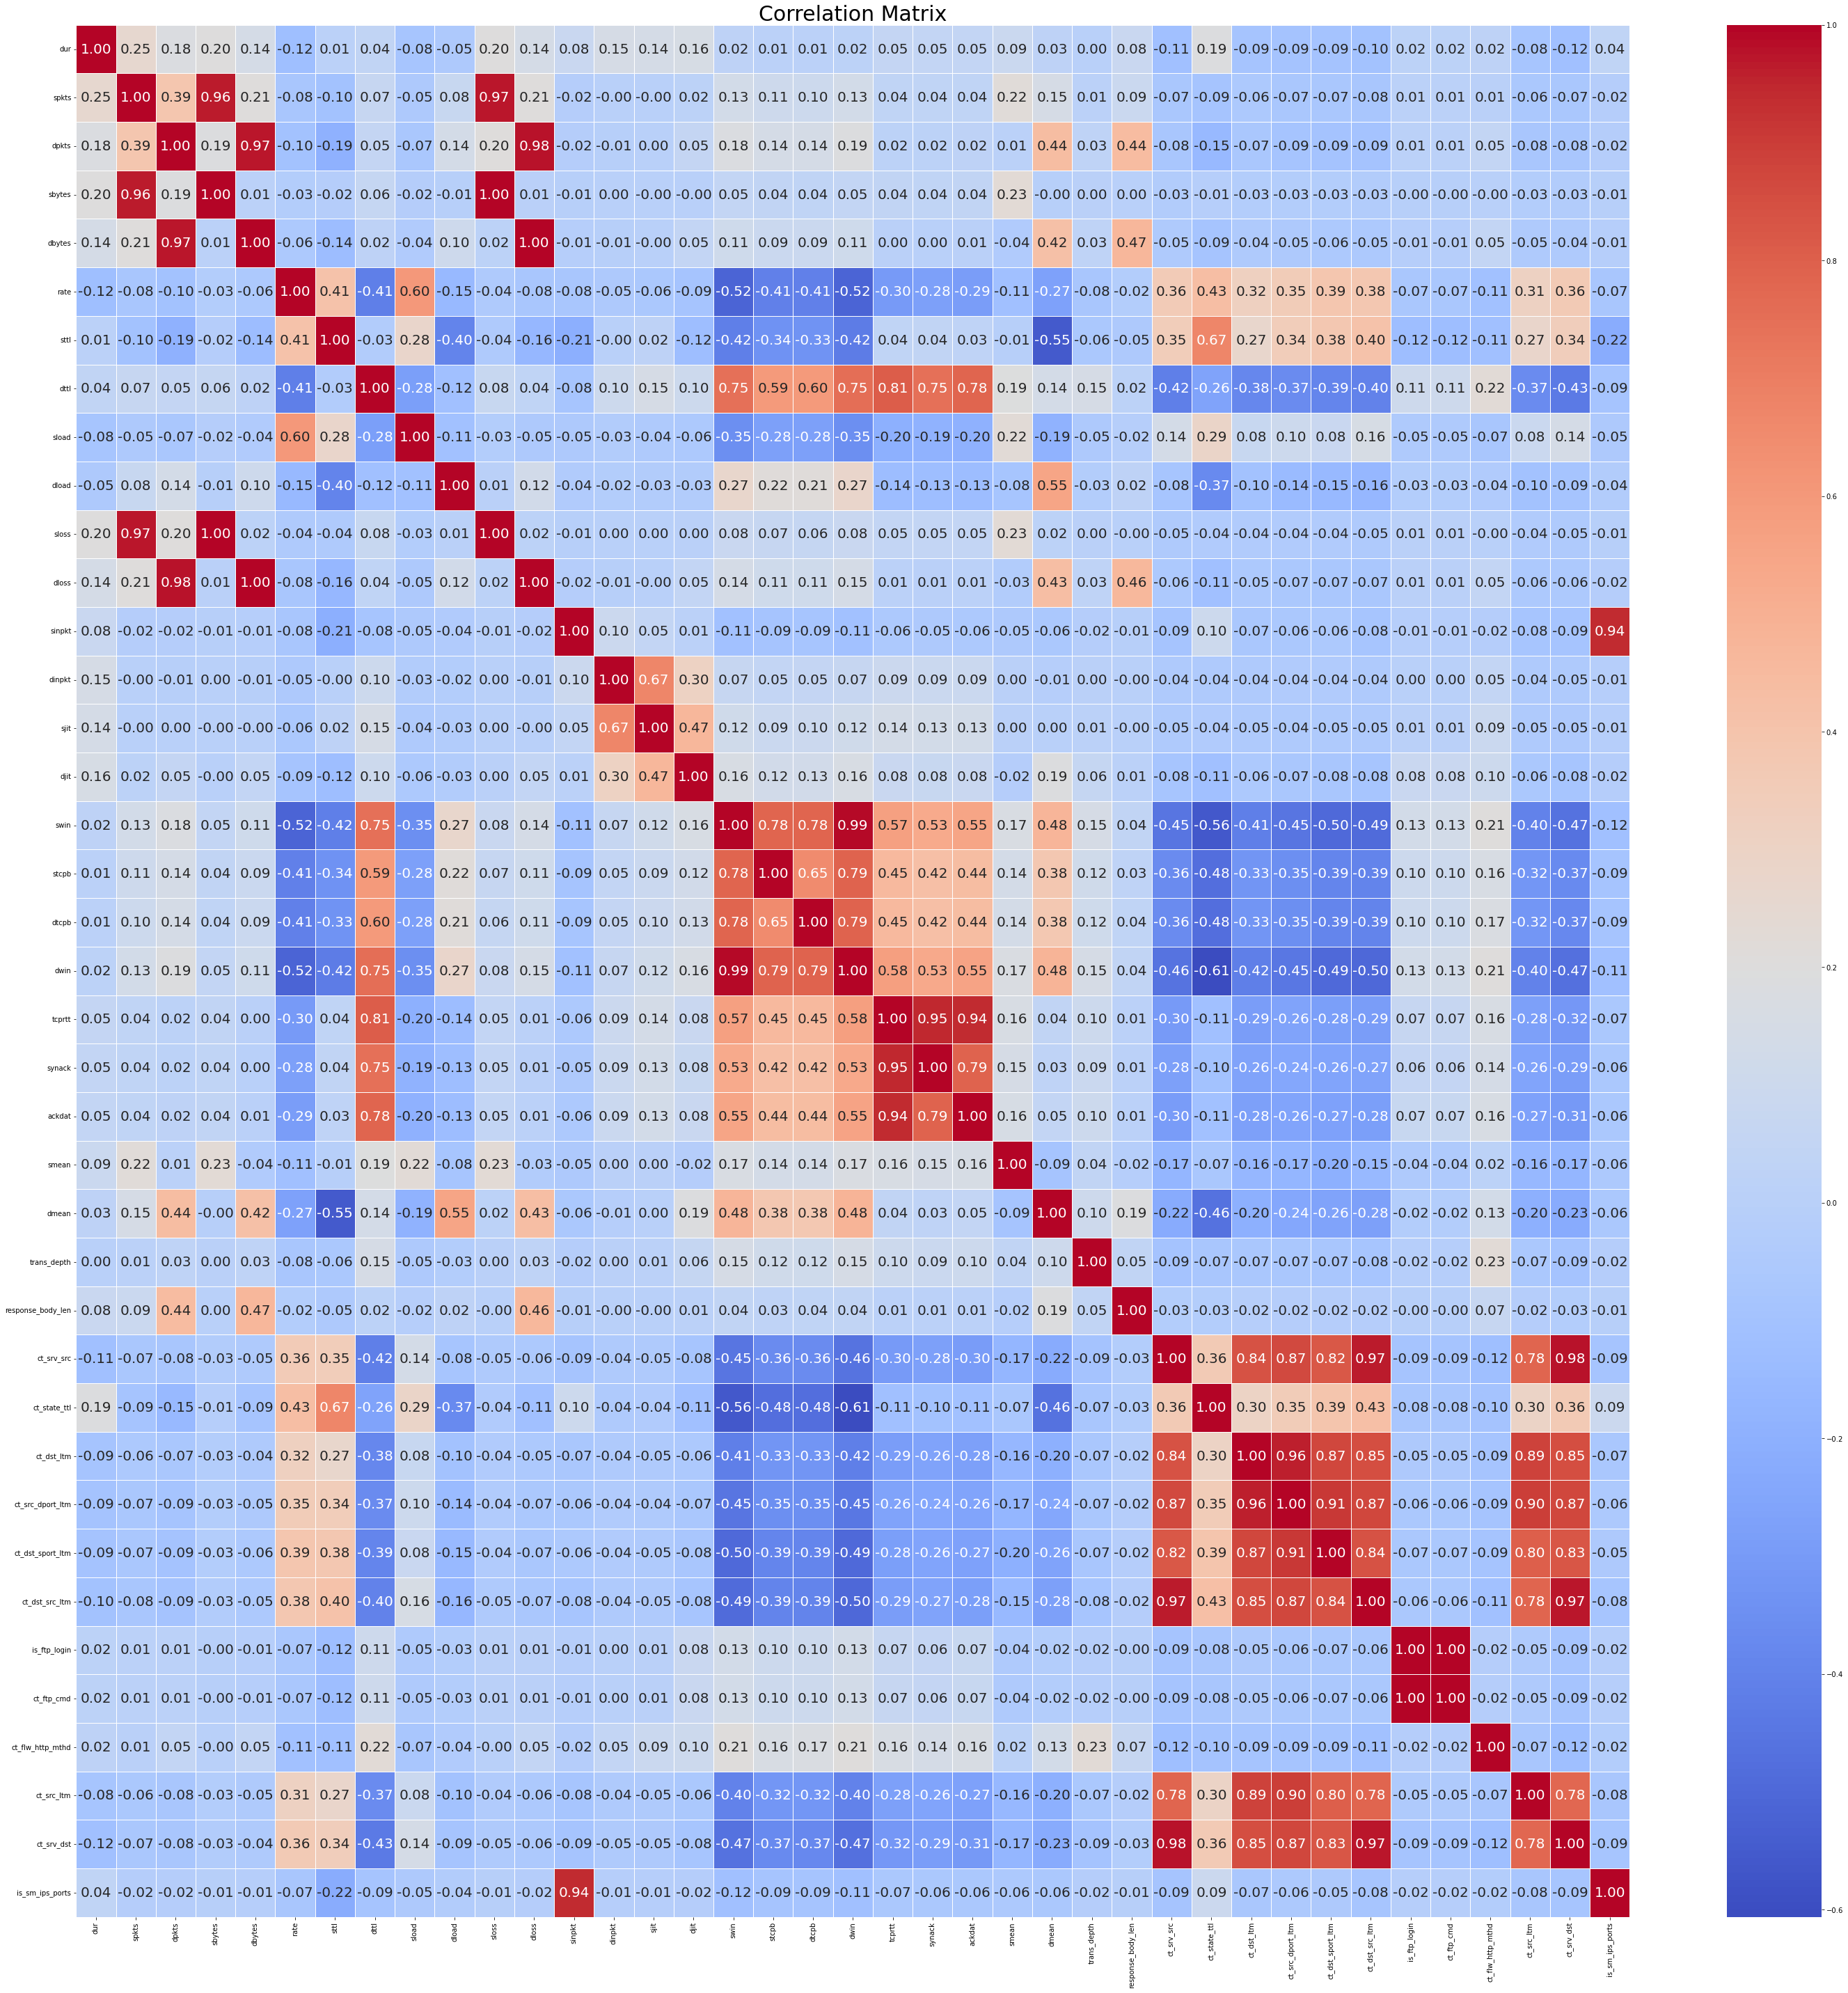

In [60]:
# Drop 'ID' and 'Label' columns
data_without_id_label = network_data.drop(columns=['id', 'label'])

# Create correlation matrix
correlation_matrix = data_without_id_label.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(50, 50))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 20})
plt.title('Correlation Matrix', fontsize=30)  # Adjust title font size
plt.show()

Based on the insights this far , we are working with 175,341 rows and 45 columns, each row represents Network Activity. 4 Columns are categorical and the rest are numerical features. There's a presence of a label column that highlights whether it was a normal vector or an abnormal network activity ( Malicious Activity). The data has no duplicate rows and it has no missing values. However I noted some columns are such as service have questionable categories such as "-", I will work with the data in this format considering it accounts for over half the records.


The dataset also has a high number of features some of which are highy correlated. This would make calculations harder in high dimensional spaces and might require longer compute and training periods. To fit the models we are working on we have to treat catgoerical variables by creating dummy variables to represent each unique entry per catgorical column. Because we have 4 catgoerical variables with many unique values the number of features could scale from 45 to an even larger number( we will analysis what the resulting number is in the codes that follow)


In industry where more features would be available 45 features might not be considered a high dimensional space but I will use it to demonstrate dimensionailty reduction techiques and how not every feature accounts for variance in the data set. 

In [23]:
# Create a copy 
original_network_data = network_data.copy()

# Drop the 'id' column
network_data = network_data.drop('id', axis=1)

**Dimensionality Reduction - Principal Component Analysis** 

In [ ]:
Dimensionaltiy reduction like the name states is an unsupervised machine learning technique that is used to transform a set of correlated variables (p) into a smaller k uncorrelated variables called principal components (k < p)

In [ ]:
network_data.head()

In [ ]:
# Reorder the columns so that object columns come first
object_columns = network_data.select_dtypes(include=['object']).columns.tolist()
non_object_columns = [col for col in network_data.columns if col not in object_columns]
ordered_columns = object_columns + non_object_columns
network_data_reordered = network_data[ordered_columns]
#Show new order 
print(network_data_reordered.dtypes)

In [ ]:
#preprocess through scaling and one hot encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#Prepocessing for PCA 
#Convert to a numpy array
X = network_data_reordered.drop(columns=['label'])  # Extract features
y = network_data_reordered['label']  # Extract target

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the shape of the feature matrix
print("Shape of feature matrix (X):", X.shape)

In [ ]:
print(X_train)

In [ ]:
# Get the data types of each column
column_data_types = network_data.dtypes

# Identify the categorical and numeric features
categorical_features = column_data_types[column_data_types == 'object'].index.tolist()
# Identify the numeric features excluding the 'label' column
numeric_features = column_data_types[(column_data_types != 'object') & (column_data_types.index != 'label')].index.tolist()

print(categorical_features)
print("-------------")
print(numeric_features)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding separately
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_val_encoded = encoder.transform(X_val[categorical_features])

# Combine encoded categorical features with numerical features
X_train_combined = np.hstack((X_train_encoded.toarray(), X_train[numeric_features]))
X_val_combined = np.hstack((X_val_encoded.toarray(), X_val[numeric_features]))
print(X_train_combined)
print(X_train_combined.dtype)
print(X_train_combined.shape)
print("-------------------------------------")
print(X_val_combined)
print(X_val_combined.dtype)
print(X_val_combined.shape)

In [ ]:
import numpy as np

# Assume X_train_combined is the variable you want to check
if isinstance(X_train_combined, np.ndarray):
    print("X_train_combined is a NumPy array.")
else:
    print("X_train_combined is not a NumPy array.")

In [ ]:
#useful functions that have i won't need for now
# # Use the first 4 indices for the object columns
# object_indices = list(range(4))
# print(object_indices)
# numeric_indices = list(range(4, X.shape[1]-1))# Start from index 4 for numeric columns
# print(numeric_indices)
# X = network_data_reordered.values
# X.shape

In [ ]:
#Import more visualisation tools
import seaborn as sns 
plt.style.use('ggplot')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Define the range of indices for scaling and PCA
numeric_features_indices = list(range(203))

# Define the preprocessing pipeline with PCA
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features_indices),  # Apply scaling to numeric features
        ('pca', PCA(n_components=X_train_combined.shape[1], random_state=2020), numeric_features_indices)  # Apply PCA to numeric features
    ]
)

# Create the pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data and transform both training and test data
X_train_preprocessed = pipeline.fit_transform(X_train_combined)
X_test_preprocessed = pipeline.transform(X_val_combined)


In [ ]:
#Extract the total vairance which should equal 100
print("Variance explained by all 203 principal components = ", sum(pipeline.named_steps['preprocessor'].named_transformers_['pca'].explained_variance_ratio_) * 100)

In [ ]:
pipeline.named_steps['preprocessor'].named_transformers_['pca'].explained_variance_ratio_ * 100

In [ ]:
# Get the PCA component from the pipeline
pca_component = pipeline.named_steps['preprocessor'].named_transformers_['pca']

# Print the explained variance ratios for each component
for i, ratio in enumerate(pca_component.explained_variance_ratio_):
    print(f"Component {i + 1}: {ratio * 100:.2f}%")


In [ ]:
np.cumsum(pipeline.named_steps['preprocessor'].named_transformers_['pca'].explained_variance_ratio_ * 100)

In [ ]:
# Get the explained variance ratios
explained_variance_ratio = pipeline.named_steps['preprocessor'].named_transformers_['pca'].explained_variance_ratio_

# Plot the cumulative explained variance
plt.plot(np.cumsum(explained_variance_ratio * 100))

# Set x-axis ticks at every 5th component
plt.xticks(np.arange(0, len(explained_variance_ratio), step=20))

# Set labels
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

# Show plot
plt.show()



In [ ]:
# Update PCA with new components

# Define the range of indices for scaling and PCA
new_components = 3

# Define the preprocessing pipeline with PCA
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features_indices),  # Apply scaling to numeric features
        ('pca', PCA(n_components=new_components, random_state=2020), numeric_features_indices)  # Apply PCA to numeric features
    ]
)

# Create the pipeline with the preprocessor
pipeline_new = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data and transform both training and test data
X_train_preprocessed_new = pipeline_new.fit_transform(X_train_combined)
X_test_preprocessed_new = pipeline_new.transform(X_val_combined)
print(X_train_preprocessed_new)

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE with two components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_train_preprocessed_new)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Scatter Plot of t-SNE Components')
plt.grid(True)
plt.show()

In [ ]:
# Update PCA with new components to check shape that preserves the data 


# Define the preprocessing pipeline with PCA
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features_indices),  # Apply scaling to numeric features
        ('pca', PCA(n_components=0.95, random_state=2020), numeric_features_indices)  # Apply PCA to numeric features
    ]
)

# Create the pipeline with the preprocessor
pipeline_95 = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data and transform both training and test data
X_train_preprocessed_95 = pipeline_95.fit_transform(X_train_combined)
X_test_preprocessed_95 = pipeline_95.transform(X_val_combined)
print(X_train_preprocessed_new)
print(X_train_preprocessed_new.shape)

**Fitting Anomaly Detection Models**

In [ ]:
# from sklearn.mixture import GaussianMixture

# # Convert sparse matrix to dense numpy array
# X_train_dense = X_train_preprocessed.toarray()

# # Fit Gaussian Mixture Model (GMM)
# gmm = GaussianMixture(n_components=2, random_state=42)
# gmm.fit(X_train_dense)  # Fit GMM on preprocessed data

# # Compute log-likelihood of each data point
# log_likelihood = gmm.score_samples(X_train_dense)

# # Convert log-likelihood to probability density
# pdf_values = np.exp(log_likelihood)

# # Set a threshold for anomaly detection
# threshold = np.percentile(pdf_values, 1)  # 1% threshold for demonstration

# # Identify anomalies
# anomalies_indices = np.where(pdf_values < threshold)[0]
# anomalies = X_train_dense[anomalies_indices]

# # Plot anomalies (assuming X_train_preprocessed contains numeric features only)
# plt.scatter(X_train_dense[:, 0], X_train_dense[:, 1], color='blue', label='Data Points')
# plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Anomaly Detection with GMM')
# plt.legend()
# plt.show()

# # Print anomalies
# print("Number of anomalies detected:", len(anomalies))
# print("Anomalies:", anomalies)

